In [1]:
import ROOT as rt
import uproot
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import aghast

In [2]:
def np_to_root(numpy_hist, name='root_hist'):
    ghastly_hist = aghast.from_numpy(numpy_hist)
    return aghast.to_root(ghastly_hist, name)

def get_max_notrunc(hist, cl = 0.95):
    normcumsum  = 1.*np.cumsum(hist[0])/sum(hist[0])
    return int(hist[1][np.argmax(normcumsum>cl)])

In [3]:
upfile = uproot.open('perfTuple_scenarioB.root')
tree = upfile['ntuple/tree']

In [15]:
def get_hists(obj='Calo',detector='Barrel', split=0.5):
    var = 'l1pfProducer%svecNL1%s'%(detector,obj)
    mask = tree.array('mc_id')==998
    array = tree.pandas.df([var]).values
    array = np.reshape(array, (tree.numentries, -1))
    array = array[mask]
    nregions = array.shape[1]
    array[:,::-1].sort(axis=-1)
    top_N = array[:,:int(split*nregions)]
    bot_N = array[:,int(split*nregions):]
    top_N_max = np.amax(top_N, axis=-1)
    bot_N_max = np.amax(bot_N, axis=-1)
    bins = np.linspace(0, np.max(array)+2,  np.max(array)+3)
    plt.figure(figsize=(5,5))
    top_N_max_hist = np.histogram(top_N_max,bins=bins)
    bot_N_max_hist = np.histogram(bot_N_max,bins=bins)
    top_notrunc = get_max_notrunc(top_N_max_hist) 
    bot_notrunc = get_max_notrunc(bot_N_max_hist) 
    plt.hist(top_N_max,bins=bins,alpha=0.7,label = 'top %i%%, 95%% no trunc: %i'%(split*100, top_notrunc))
    plt.hist(bot_N_max,bins=bins,alpha=0.7,label='bottom %i%%, 95%% no trunc: %i'%((1-split)*100, bot_notrunc))
    plt.semilogy()
    plt.xlabel('Max %s in %s region'%(obj, detector))
    plt.xlim(0, np.max(array)+3)
    plt.ylabel('Events')
    plt.legend()
    plt.savefig('%sMax%sSplit%s.pdf'%(obj,detector,int(split*100)))
    return top_N_max_hist, bot_N_max_hist

('Calo', 'Barrel', '95% no trunc.', 'top', 17, 'bottom', 10)
('Calo', 'HGCal', '95% no trunc.', 'top', 58, 'bottom', 46)
('Calo', 'HGCalNoTK', '95% no trunc.', 'top', 37, 'bottom', 31)
('Calo', 'HF', '95% no trunc.', 'top', 16, 'bottom', 11)
('EmCalo', 'Barrel', '95% no trunc.', 'top', 13, 'bottom', 4)
('EmCalo', 'HGCal', '95% no trunc.', 'top', 0, 'bottom', 0)
('EmCalo', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('EmCalo', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('TK', 'Barrel', '95% no trunc.', 'top', 24, 'bottom', 10)
('TK', 'HGCal', '95% no trunc.', 'top', 19, 'bottom', 9)
('TK', 'HGCalNoTK', '95% no trunc.', 'top', 6, 'bottom', 2)
('TK', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('Mu', 'Barrel', '95% no trunc.', 'top', 2, 'bottom', 0)
('Mu', 'HGCal', '95% no trunc.', 'top', 2, 'bottom', 0)
('Mu', 'HGCalNoTK', '95% no trunc.', 'top', 1, 'bottom', 0)
('Mu', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)


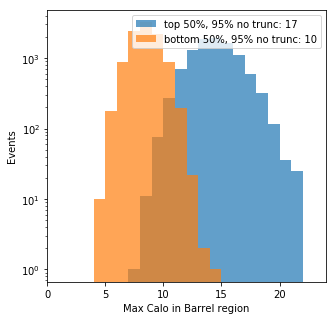

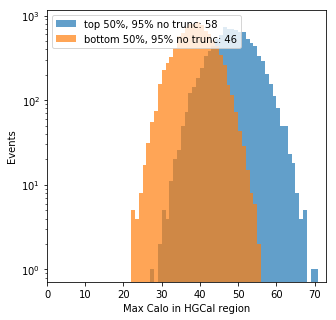

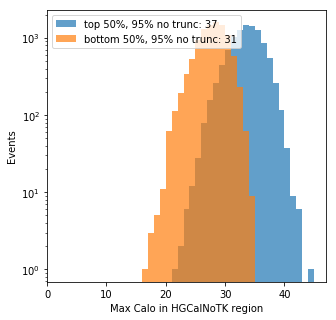

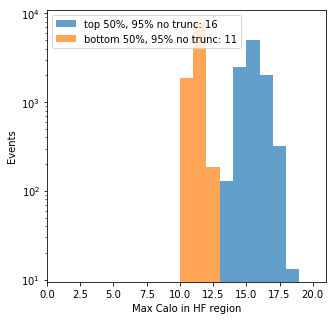

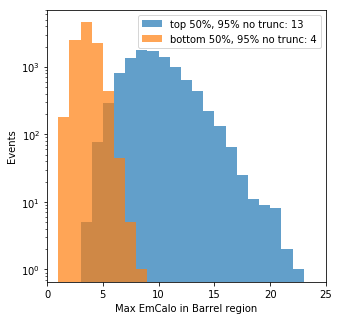

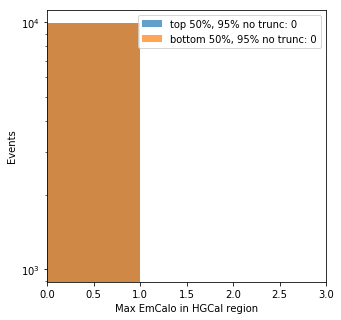

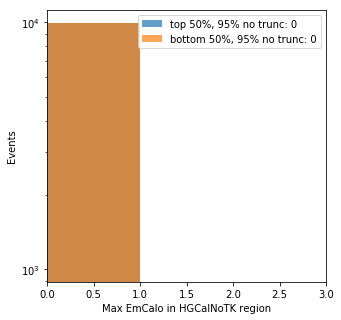

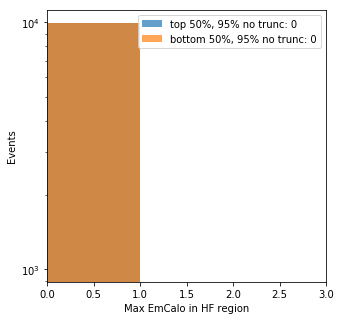

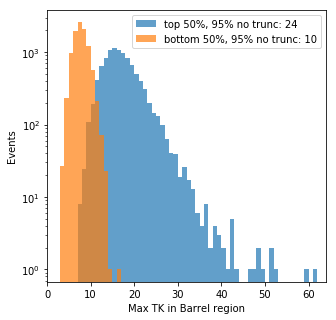

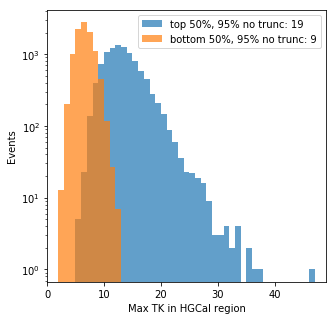

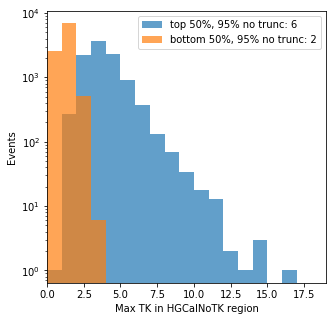

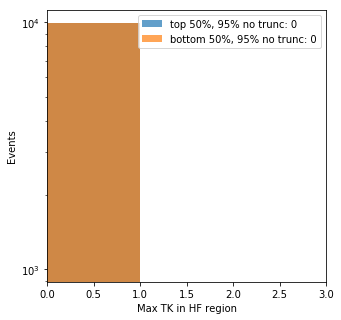

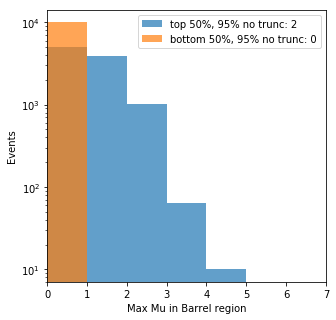

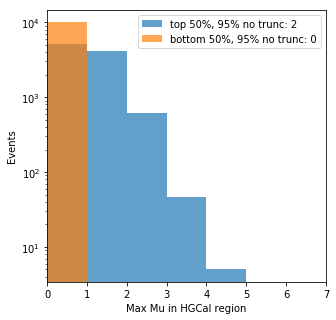

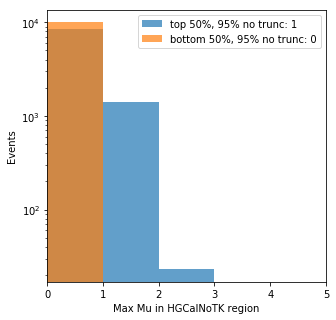

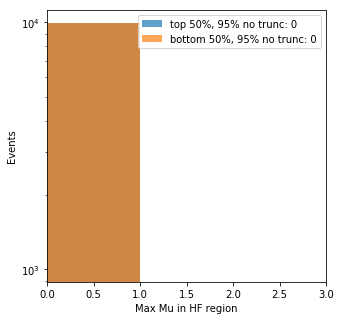

In [16]:
for obj in ['Calo', 'EmCalo', 'TK', 'Mu']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(obj=obj, detector=detector, split=0.5)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        bot_N_max_hist_95cl = get_max_notrunc(bot_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl, 'bottom', bot_N_max_hist_95cl)

In [6]:
def get_arrays(objs=['Calo'],detectors=['Barrel']):
    for detector in detectors:
        for obj in objs:
            var = 'l1pfProducer%svecNL1%s'%(detector,obj)
            array = tree.pandas.df([var]).values
            array = np.reshape(array, (tree.numentries, -1))
            nregions = array.shape[1]
            print(array.shape)
            
get_arrays(objs=['Calo', 'EmCalo', 'TK', 'Mu'],detectors=['Barrel', 'HGCal', 'HGCalNoTK', 'HF'])

(69175, 36)
(69175, 36)
(69175, 36)
(69175, 36)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 18)
(69175, 72)
(69175, 72)
(69175, 72)
(69175, 72)


In [7]:
print(tree.keys())

['run', 'lumi', 'event', 'mc_pt', 'mc_pt02', 'mc_eta', 'mc_phi', 'mc_iso02', 'mc_iso04', 'mc_iso08', 'mc_id', 'mc_q', 'mc_caloeta', 'mc_calophi', 'ChGenAcc_pt', 'ChGenAcc_pt02', 'ChGenAcc_pt08', 'ChGenAcc_ptbest', 'ChGenAcc_pthighest', 'ChGenAcc_mindr025', 'ChGenAcc_n025', 'ChGenAcc_n010', 'GenAcc_pt', 'GenAcc_pt02', 'GenAcc_pt08', 'GenAcc_ptbest', 'GenAcc_pthighest', 'GenAcc_mindr025', 'GenAcc_n025', 'GenAcc_n010', 'L1Calo_pt', 'L1Calo_pt02', 'L1Calo_pt08', 'L1Calo_ptbest', 'L1Calo_pthighest', 'L1Calo_mindr025', 'L1Calo_n025', 'L1Calo_n010', 'L1PF_pt', 'L1PF_pt02', 'L1PF_pt08', 'L1PF_ptbest', 'L1PF_pthighest', 'L1PF_mindr025', 'L1PF_n025', 'L1PF_n010', 'L1PFCharged_pt', 'L1PFCharged_pt02', 'L1PFCharged_pt08', 'L1PFCharged_ptbest', 'L1PFCharged_pthighest', 'L1PFCharged_mindr025', 'L1PFCharged_n025', 'L1PFCharged_n010', 'L1PFNeutral_pt', 'L1PFNeutral_pt02', 'L1PFNeutral_pt08', 'L1PFNeutral_ptbest', 'L1PFNeutral_pthighest', 'L1PFNeutral_mindr025', 'L1PFNeutral_n025', 'L1PFNeutral_n010', 

('PFChargedHadron', 'Barrel', '95% no trunc.', 'top', 13, 'bottom', 3)
('PFChargedHadron', 'HGCal', '95% no trunc.', 'top', 8, 'bottom', 2)
('PFChargedHadron', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('PFChargedHadron', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('PFNeutralHadron', 'Barrel', '95% no trunc.', 'top', 6, 'bottom', 2)
('PFNeutralHadron', 'HGCal', '95% no trunc.', 'top', 14, 'bottom', 8)
('PFNeutralHadron', 'HGCalNoTK', '95% no trunc.', 'top', 9, 'bottom', 4)
('PFNeutralHadron', 'HF', '95% no trunc.', 'top', 7, 'bottom', 4)
('PFElectron', 'Barrel', '95% no trunc.', 'top', 3, 'bottom', 0)
('PFElectron', 'HGCal', '95% no trunc.', 'top', 7, 'bottom', 2)
('PFElectron', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('PFElectron', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('PFPhoton', 'Barrel', '95% no trunc.', 'top', 9, 'bottom', 2)
('PFPhoton', 'HGCal', '95% no trunc.', 'top', 21, 'bottom', 13)
('PFPhoton', 'HGCalNoTK', '95% no trunc.', 'top', 13, 'bo

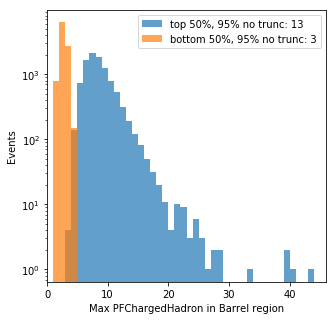

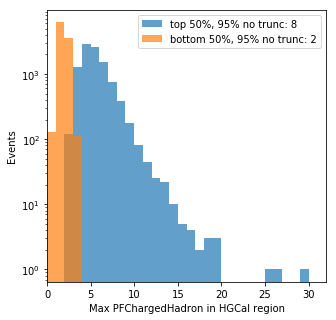

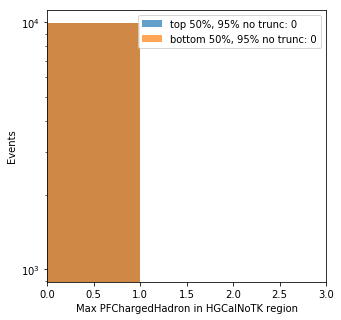

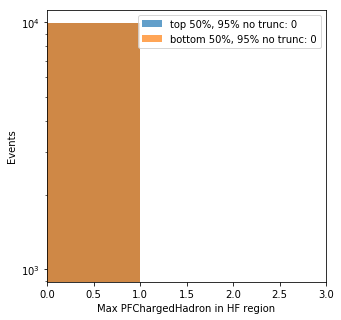

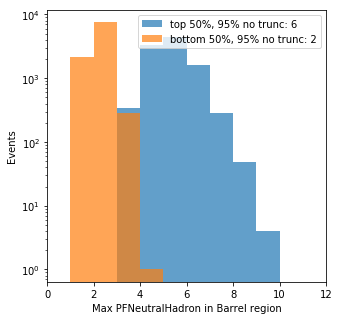

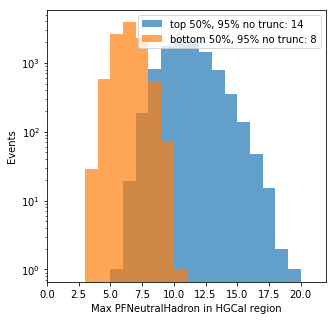

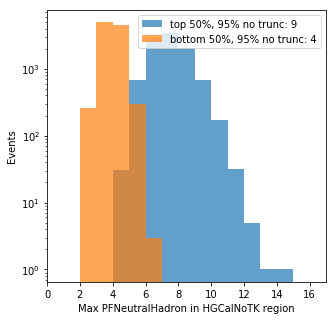

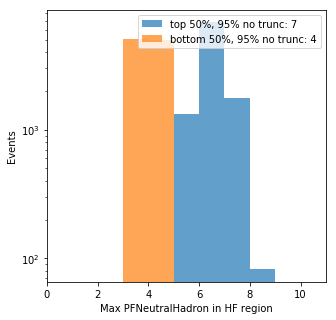

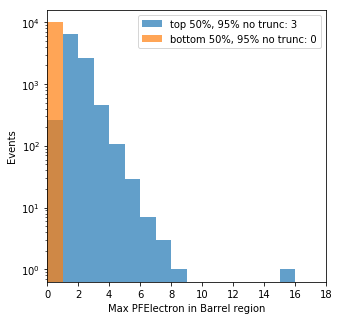

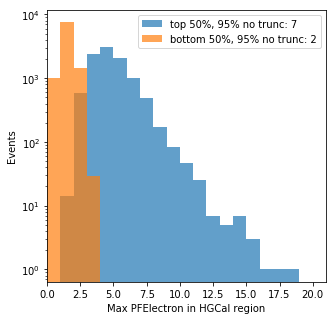

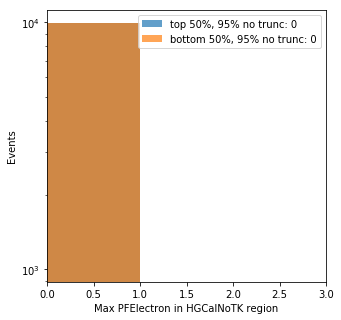

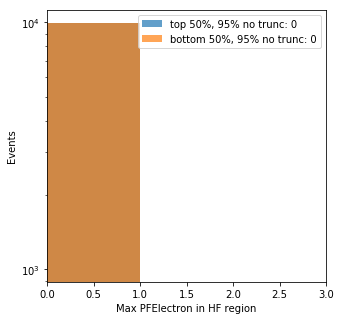

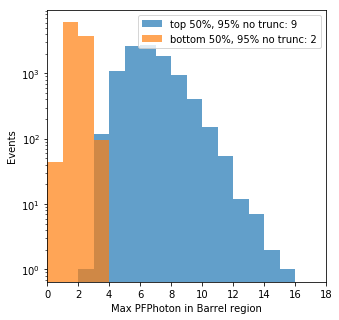

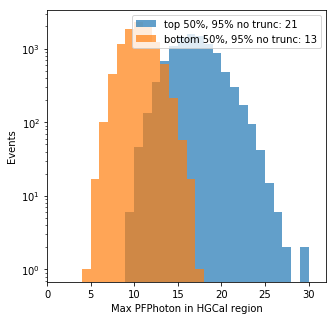

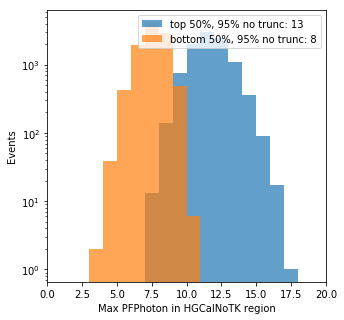

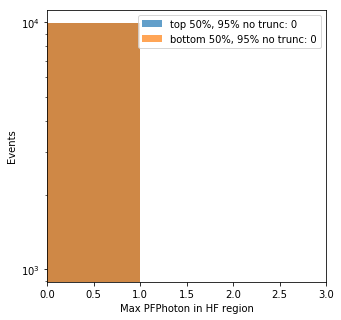

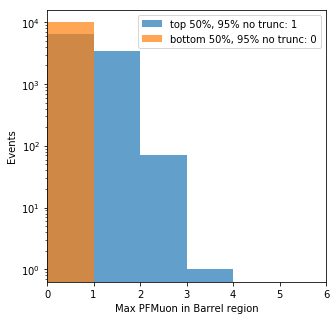

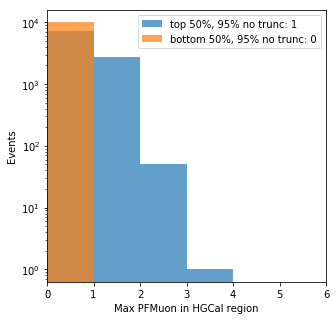

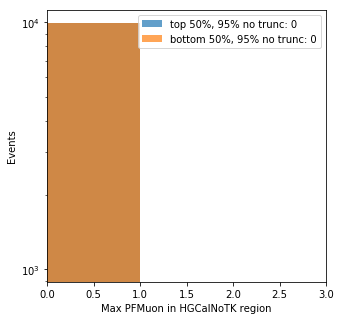

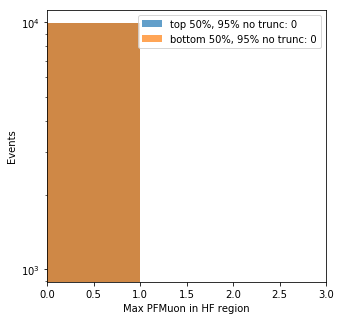

In [17]:
for obj in ['PFChargedHadron','PFNeutralHadron', 'PFElectron','PFPhoton', 'PFMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(obj=obj, detector=detector, split=0.5)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        bot_N_max_hist_95cl = get_max_notrunc(bot_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl, 'bottom', bot_N_max_hist_95cl)

('PuppiChargedHadron', 'Barrel', '95% no trunc.', 'top', 9, 'bottom', 0)
('PuppiChargedHadron', 'HGCal', '95% no trunc.', 'top', 6, 'bottom', 1)
('PuppiChargedHadron', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('PuppiChargedHadron', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('PuppiNeutralHadron', 'Barrel', '95% no trunc.', 'top', 2, 'bottom', 0)
('PuppiNeutralHadron', 'HGCal', '95% no trunc.', 'top', 2, 'bottom', 0)
('PuppiNeutralHadron', 'HGCalNoTK', '95% no trunc.', 'top', 2, 'bottom', 0)
('PuppiNeutralHadron', 'HF', '95% no trunc.', 'top', 1, 'bottom', 0)
('PuppiElectron', 'Barrel', '95% no trunc.', 'top', 2, 'bottom', 0)
('PuppiElectron', 'HGCal', '95% no trunc.', 'top', 5, 'bottom', 0)
('PuppiElectron', 'HGCalNoTK', '95% no trunc.', 'top', 0, 'bottom', 0)
('PuppiElectron', 'HF', '95% no trunc.', 'top', 0, 'bottom', 0)
('PuppiPhoton', 'Barrel', '95% no trunc.', 'top', 6, 'bottom', 0)
('PuppiPhoton', 'HGCal', '95% no trunc.', 'top', 5, 'bottom', 0)
('PuppiPhoton', 'HG

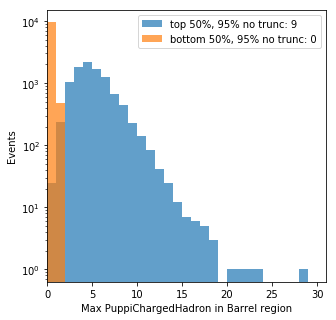

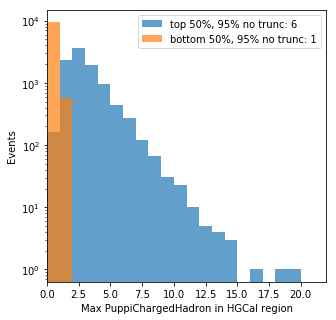

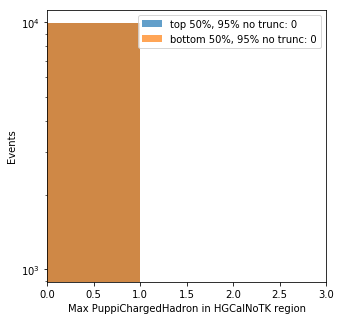

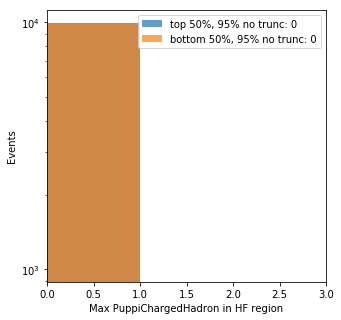

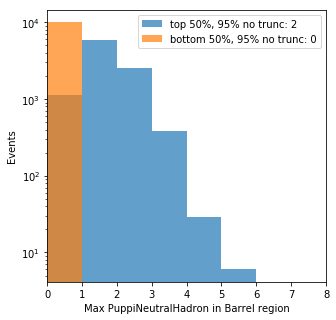

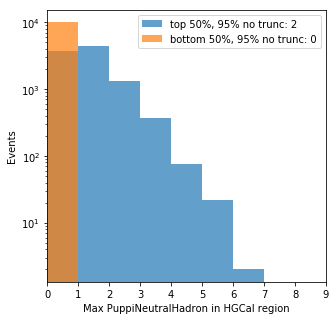

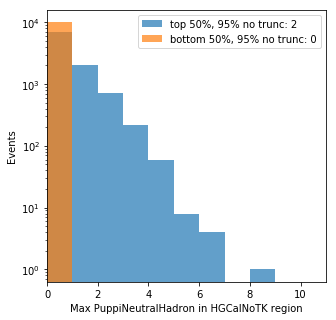

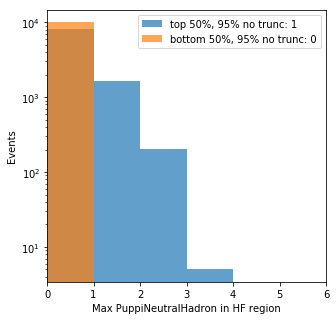

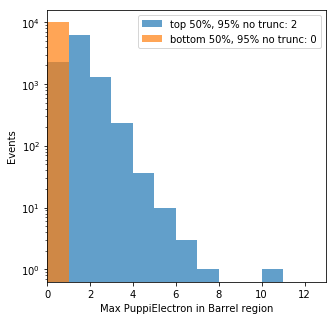

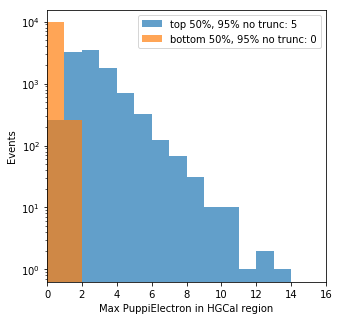

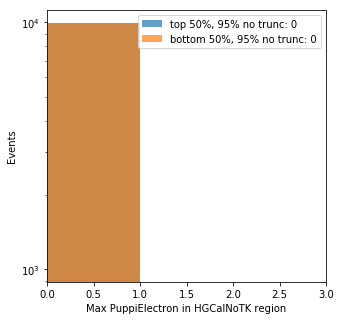

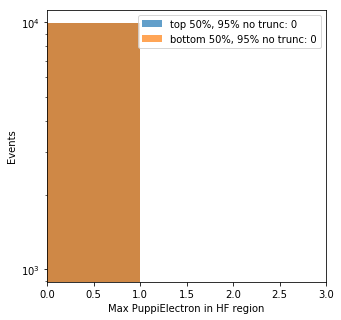

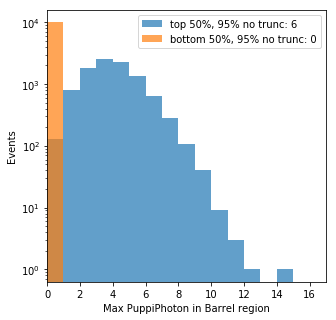

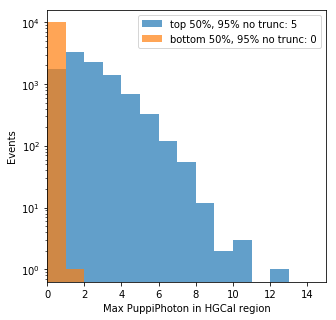

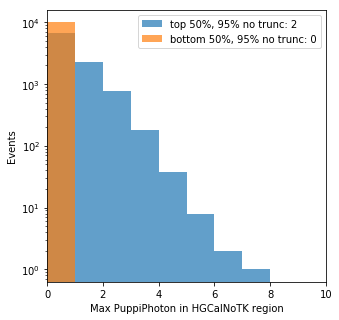

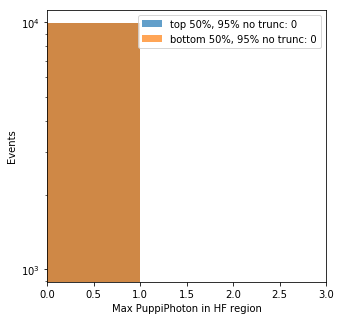

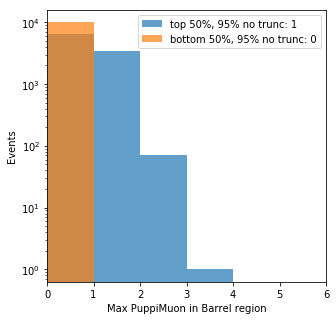

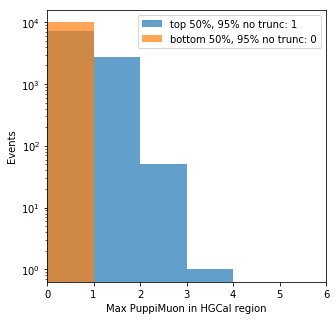

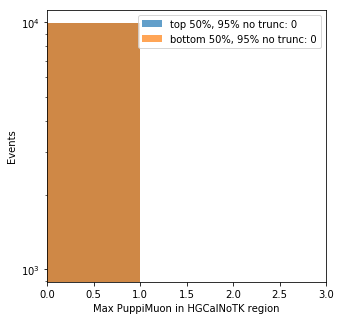

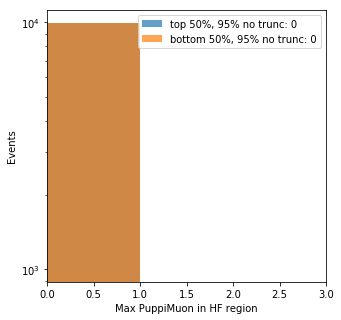

In [18]:
for obj in ['PuppiChargedHadron','PuppiNeutralHadron', 'PuppiElectron','PuppiPhoton', 'PuppiMuon']:
    for detector in ['Barrel', 'HGCal', 'HGCalNoTK', 'HF']:
        top_N_max_hist, bot_N_max_hist = get_hists(obj=obj, detector=detector, split=0.5)
        top_N_max_hist_95cl = get_max_notrunc(top_N_max_hist, cl=0.95)
        bot_N_max_hist_95cl = get_max_notrunc(bot_N_max_hist, cl=0.95)
        print(obj, detector, '95% no trunc.', 'top', top_N_max_hist_95cl, 'bottom', bot_N_max_hist_95cl)